In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
plt.rcParams['figure.figsize'] = [12, 5]

In [28]:
df = pd.read_csv('result.csv')

In [29]:
f = open('products','r')
urls = f.read().split('\n')
f.close()
urls = list(map(lambda x: x.replace('https://www.tiendainglesa.com.uy/',''), urls))
urls = list(map(lambda x: x.replace('.producto',''), urls))

products_dict = {}
for u in urls:
    parts = u.split('?')
    p_id = parts[1]
    p_name = parts[0]
    products_dict[p_id] = p_name

In [30]:
def product_name(products_dict, p_id):
    return products_dict[str(p_id)]
df['product_name'] = df.product_id.apply(lambda x: product_name(products_dict, x))
df

,date,product_id,price,product_name
0,2019-11-20,6507,465,Vacio_de_ternera_%28kg%29
1,2019-11-20,1000,790,Salmon_filet_chileno_fresco_x_kg
2,2019-11-20,2421,362,Lomo_de_merluza_especial_sin_espina_%28kg%29
3,2019-11-20,6370,79,Frutillas_en_petaca_500gr
4,2019-11-20,25213,65,Palta_hass
5,2019-11-20,279660,150,Cerveza_heineken_descartable_1lt
6,2019-11-20,248791,106,Lavandina_vim_en_gel_750ml
7,2019-11-20,372188,252,Caf%C3%A9-Molido-Tradicional-Iguacu--500g
8,2019-11-20,364938,850,Caf%C3%A9-Lavazza-Grand-Hotel-1kg
9,2019-11-21,6507,465,Vacio_de_ternera_%28kg%29


In [35]:
products_dict.keys()

dict_keys(['6507', '1000', '2421', '6370', '25213', '279660', '248791', '372188', '364938'])

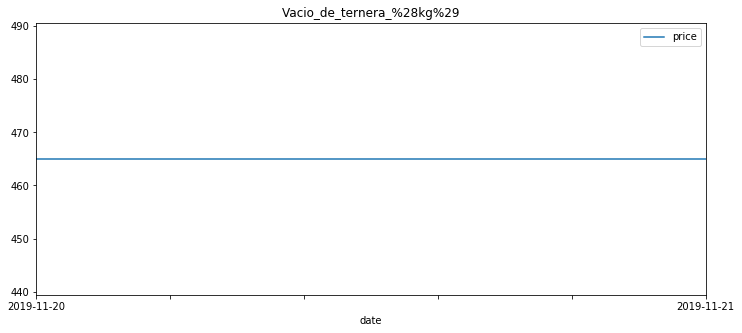

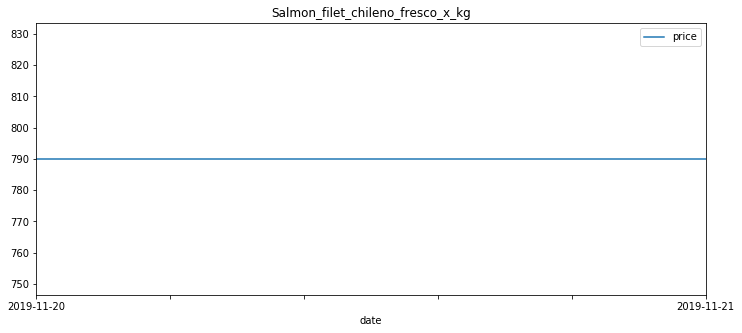

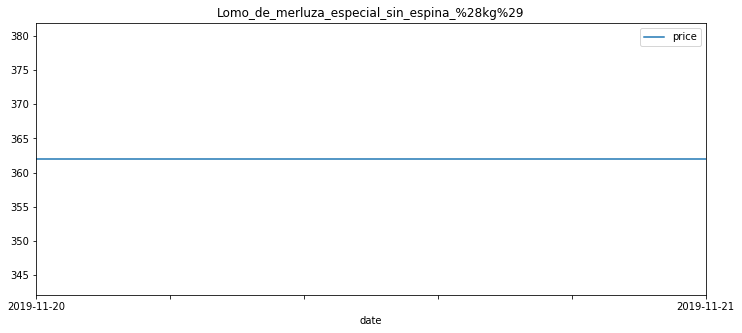

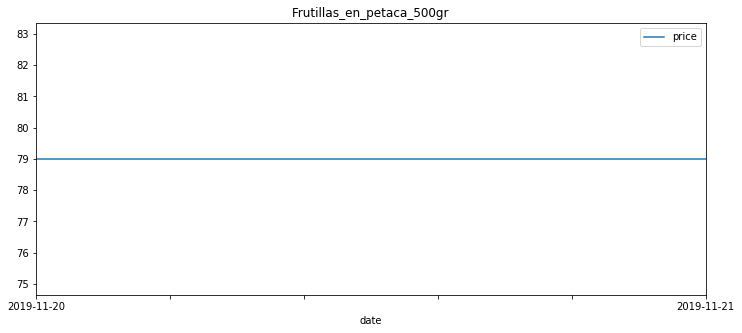

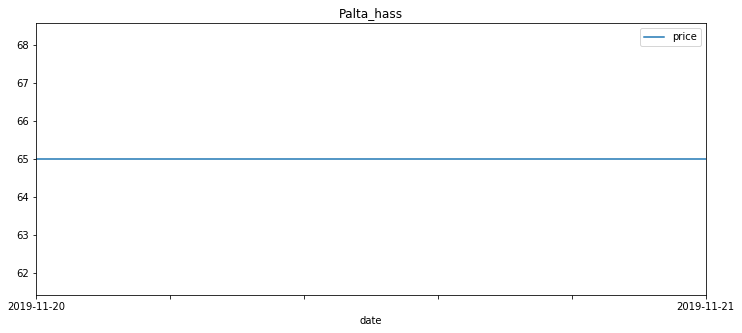

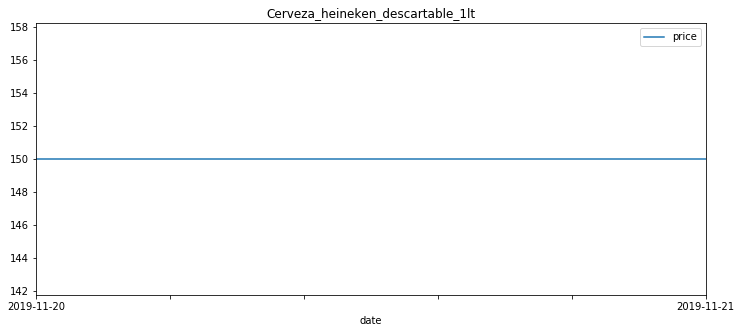

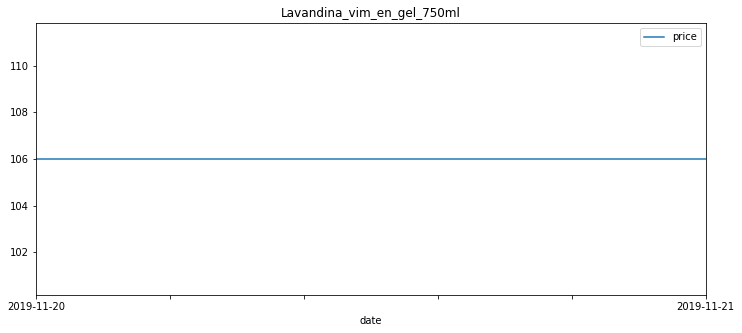

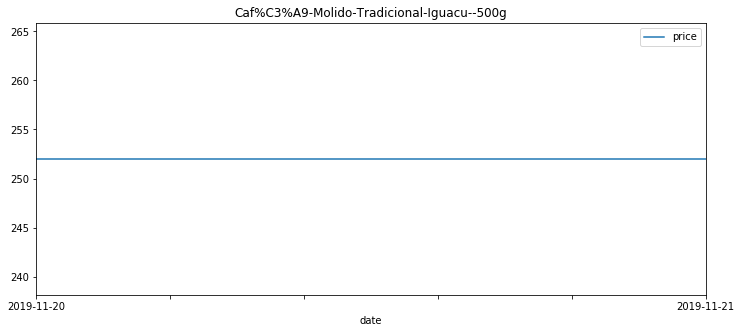

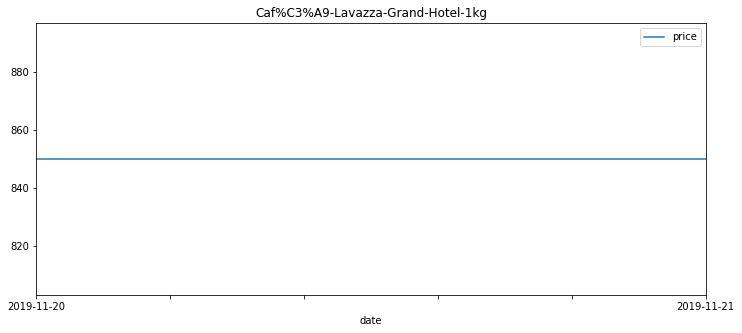

In [36]:
for k in products_dict.keys():
    df[df.product_id == int(k)].plot(x='date',y='price',title=products_dict[k])